<a href="https://colab.research.google.com/github/aditeedhere/Stock-Market-Portfolio-using-K-Means-and-Gaussian-Mixture-Model/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Step-1 Elbow Method
  The below section includes the code for elbow method.
  The elbow method is a graphical technique used in data analysis and machine learning for finding the optimal number of clusters in a dataset. It is commonly applied in clustering algorithms, such as k-means clustering. The method helps to determine the point at which the addition of more clusters does not significantly improve the variance within each cluster.

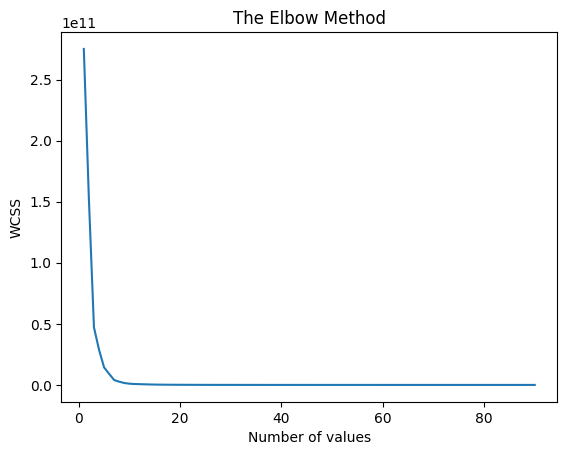

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Project_dataset.csv')
X = dataset.iloc[:, 2:6].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 91):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 91), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of values')
plt.ylabel('WCSS')
plt.show()

# 2.Clustering using K-Means Algorithm analysis

K-means is a clustering algorithm that partitions data into k clusters. It iteratively assigns points to the nearest cluster center, recalculates centroids, and repeats until convergence. It minimizes the sum of squared distances within clusters, aiming to create compact, well-separated groupings in the data.

The average silhouette score is: 0.5484338458087618


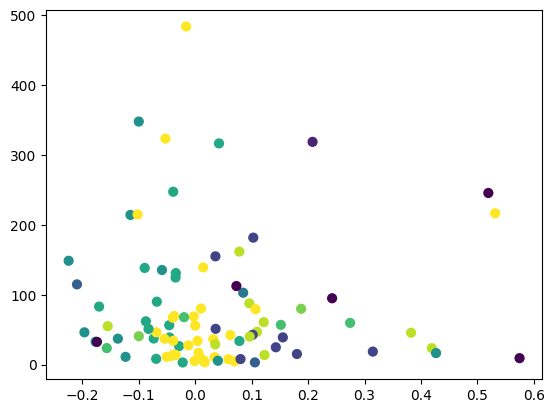

In [ ]:
import numpy as np      #For numerical Operation
import matplotlib.pyplot as plt     #For visualization
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time

# Class Definition
class KMeansFromScratch:
    def __init__(self, n_clusters = 2, max_iters=300, random_state=None):
        self.n_clusters = n_clusters        #No.of Clusters
        self.max_iters = max_iters
        self.random_state = random_state      #for random number generation

 #Initialize KMeans clustering process
    def fit(self, X):
        np.random.seed(self.random_state)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):               #core implementation of Kmeans

            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2) #calculates the distances between each data point and all cluster centroids
            labels = np.argmin(distances, axis=1)

            #Update cluster centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, X):         #assigning new datapoint to nearest cluster centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels



# Instantiate and fit K-Means model
kmeans = KMeansFromScratch(n_clusters=11, max_iters=500, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

from sklearn import mixture
start_time_kmeans = time.time()
kmeans = KMeansFromScratch(n_clusters=11, max_iters=500, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
end_time_kmeans = time.time()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');



from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_kmeans)
print(f"The average silhouette score is: {silhouette_avg}")






::

*   Below code represents the Combinations of various stocks



In [ ]:
dataset['cluster'] = y_kmeans
dataset

,Company Name,Code,Expt_Ret,Var,Composite_Ratio,Intrinsic_Value,cluster
0,Reliance Industries Ltd,RELI,-0.034402,130.900270,14.8885,2823.650596,6
1,TCS,TCS,0.014185,139.065104,14.6260,-108.779388,10
2,HDFC Bank Ltd.,HDBK,0.095821,87.581010,30.4225,-9628.323414,9
3,Infosys Ltd.,INFY,0.010215,80.181204,11.9180,-4.452373,10
4,HDFC Ltd.,HDFC,0.078156,161.718709,30.4225,-11679.306780,9
...,...,...,...,...,...,...,...
85,SAIL (Steel Authority of India Ltd.),SAIL,0.016605,3.196678,14.9855,887.684779,10
86,Eicher Motors Ltd.,EICH,-0.039003,247.407547,11.9565,6394.887013,6
87,Indraprastha Gas Ltd.,IGAS,-0.012288,27.376710,12.3160,-714.810497,10
88,Indigo Paints Ltd.,INDG,-0.224297,148.586109,23.1795,16368.332620,5


In [ ]:
from itertools import product

def generate_combinations(stock_codes, cluster_numbers, max_companies_per_combination=10, num_groups=3):
    combinations = [[] for _ in range(num_groups)]
    used_stock_codes = set()

    for combination in product(stock_codes, cluster_numbers):
        # Check if the stock code is already used in another combination
        stock_code = combination[0]
        if stock_code not in used_stock_codes:
            # Find the group index for the stock code
            group_index = len(used_stock_codes) % num_groups
            combinations[group_index].append(combination)
            used_stock_codes.add(stock_code)

    return combinations

# Example usage:
# Assuming 'dataset' is a DataFrame and you want to use the 'Code' and 'cluster' columns
stock_codes = dataset['Code']
cluster_numbers = dataset['cluster']

combinations = generate_combinations(stock_codes, cluster_numbers, max_companies_per_combination=10, num_groups=9)

# Print the generated combinations for each group
for group_index, group_combinations in enumerate(combinations):
    print(f"Group {group_index + 1} combinations:")
    for combination in group_combinations:
        print(combination)
    print()



Group 1 combinations:
('RELI', 6)
('BJFN', 6)
('NEST', 6)
('NTPC', 6)
('SUN', 6)
('TTCH', 6)
('TORP', 6)
('GOCP', 6)
('BOB', 6)
('BFRG', 6)

Group 2 combinations:
('TCS', 6)
('ITC', 6)
('TAMO', 6)
('SBIL', 6)
('CIPL', 6)
('MUTT', 6)
('COLG', 6)
('UBBW', 6)
('GMRI', 6)
('JSWE', 6)

Group 3 combinations:
('HDBK', 6)
('LART', 6)
('ULTC', 6)
('DIVI', 6)
('HROM', 6)
('PWFC', 6)
('HPCL', 6)
('GLEN', 6)
('CAST', 6)
('ESCO', 6)

Group 4 combinations:
('INFY', 6)
('ASPN', 6)
('TITN', 6)
('HALC', 6)
('UPLL', 6)
('ADEL', 6)
('BPCL', 6)
('BION', 6)
('NMDC', 6)
('EXID', 6)

Group 5 combinations:
('HDFC', 6)
('AXBK', 6)
('PGRD', 6)
('IOC', 6)
('GRAS', 6)
('HVEL', 6)
('BRGR', 6)
('TTPW', 6)
('HIAE', 6)
('SAIL', 6)

Group 6 combinations:
('ICBK', 6)
('MAHM', 6)
('ARBN', 6)
('COAL', 6)
('TISC', 6)
('PNBK', 6)
('INIR', 6)
('PLNG', 6)
('TREN', 6)
('EICH', 6)

Group 7 combinations:
('KTKM', 6)
('HCLT', 6)
('APSE', 6)
('TEML', 6)
('JSTL', 6)
('CROP', 6)
('RYMD', 6)
('AVEU', 6)
('PIDI', 6)
('IGAS', 6)

Grou



> Below code is used for K-Fold cross validation method
K-fold cross-validation is a technique used to assess the performance and generalization capability of a machine learning model. In the context of clustering, like your k-means algorithm, cross-validation can provide insights into the robustness and effectiveness of the clusters it forms.

---





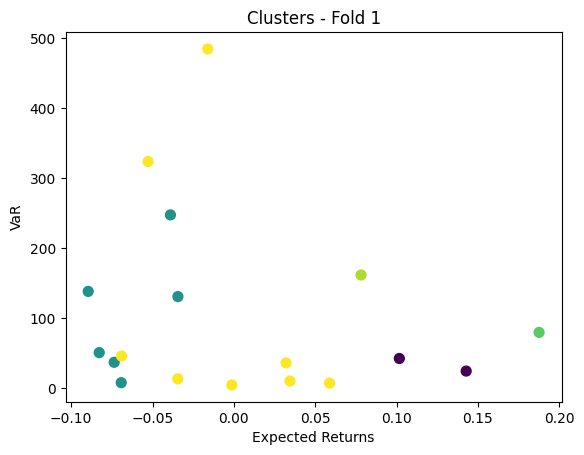

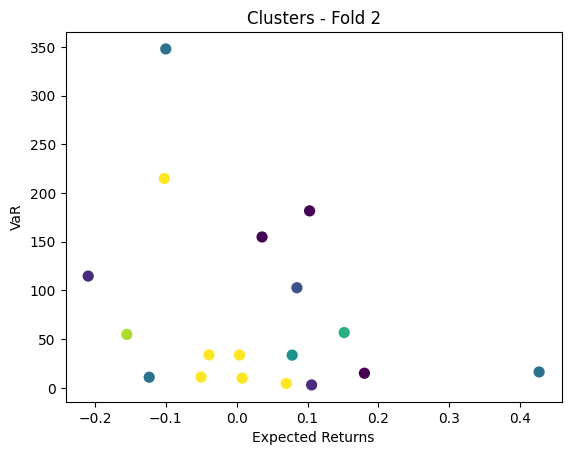

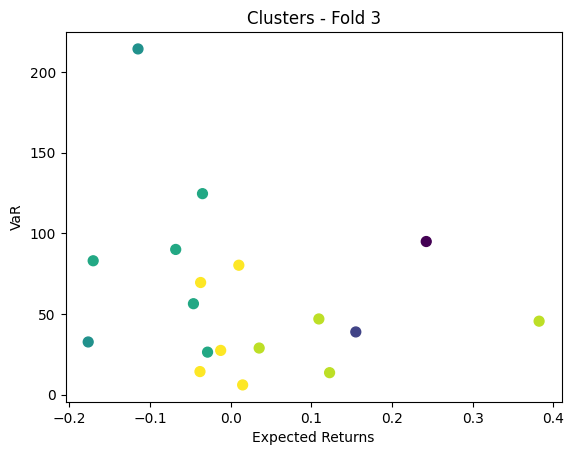

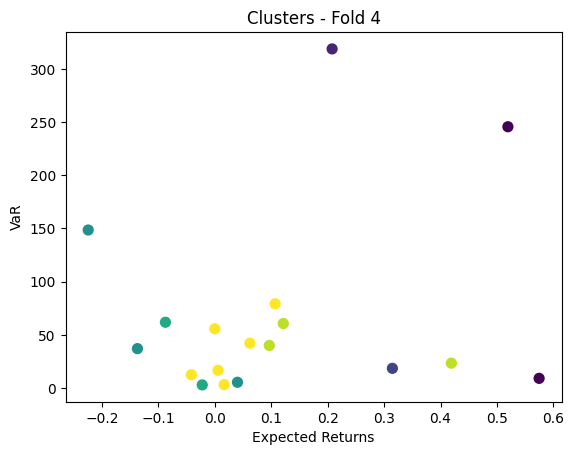

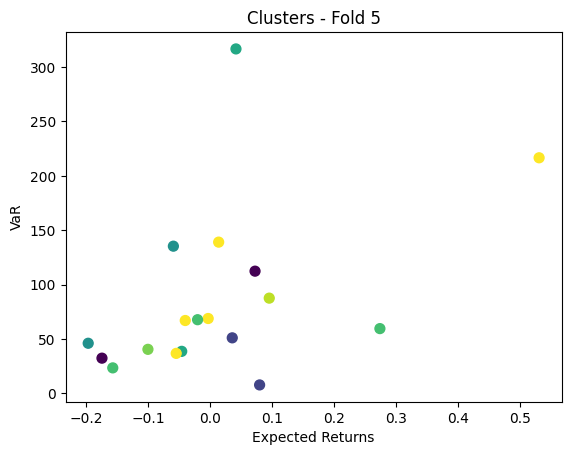

Fold 1: Silhouette Score = 0.402118605831543
Fold 2: Silhouette Score = 0.5562180534043163
Fold 3: Silhouette Score = 0.2216368048677414
Fold 4: Silhouette Score = 0.46726121237110874
Fold 5: Silhouette Score = 0.469664177922222

Average Silhouette Score across all folds: 0.4233797708793864


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold


num_clusters = 11

# Set the number of folds for k-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store silhouette scores for each fold
silhouette_scores = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]


    y_k_means = kmeans.predict(X_test)
    # Calculate silhouette score for the fold
    silhouette_avg = silhouette_score(X_test, y_k_means)
    silhouette_scores.append(silhouette_avg)

    # Visualize the clusters for each fold (optional)
    plt.scatter(X_test[:, 0], X_test[:, 1], s=50, c=y_k_means, cmap='viridis')
    plt.title(f'Clusters - Fold {fold + 1}')
    plt.xlabel('Expected Returns')
    plt.ylabel('VaR')
    plt.show()

# Print the silhouette scores for each fold
for fold, score in enumerate(silhouette_scores):
    print(f"Fold {fold + 1}: Silhouette Score = {score}")

# Print the average silhouette score across all folds
average_score = np.mean(silhouette_scores)
print(f"\nAverage Silhouette Score across all folds: {average_score}")



# 3. By using Gaussian mixture model
A Gaussian Mixture Model (GMM) is a probabilistic model used for clustering and density estimation. It assumes that the data is generated from a mixture of several Gaussian distributions, each characterized by its mean and covariance. GMM accommodates complex data structures, allowing clusters to have different shapes, sizes, and orientations. It provides a soft assignment of data points to clusters, capturing the underlying uncertainty in the data distribution, making it particularly useful for modeling datasets with intricate patterns and overlapping clusters.

The average silhouette score is: 0.17608615815576964


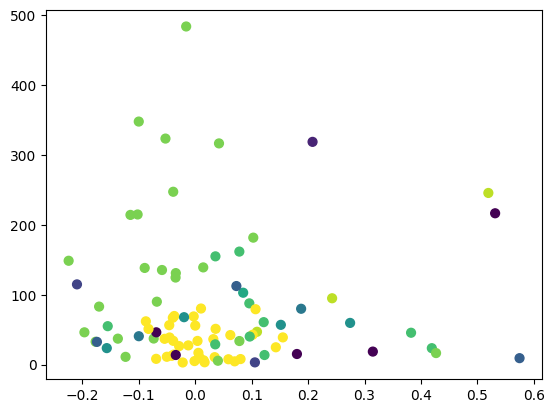

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Generate some data
dataset = pd.read_csv('Project_dataset.csv')
X = dataset.iloc[:, 2:6].values


from sklearn import mixture
start_time_gmm = time.time()
gmm = mixture.GaussianMixture(n_components=11)
gmm.fit(X)
labels = gmm.predict(X)
end_time_gmm = time.time()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print(f"The average silhouette score is: {silhouette_avg}")


Below code is used for K-Fold cross validation method K-fold cross-validation is a technique used to assess the performance and generalization capability of a machine learning model. In the context of clustering, like your k-means algorithm, cross-validation can provide insights into the robustness and effectiveness of the clusters it forms.

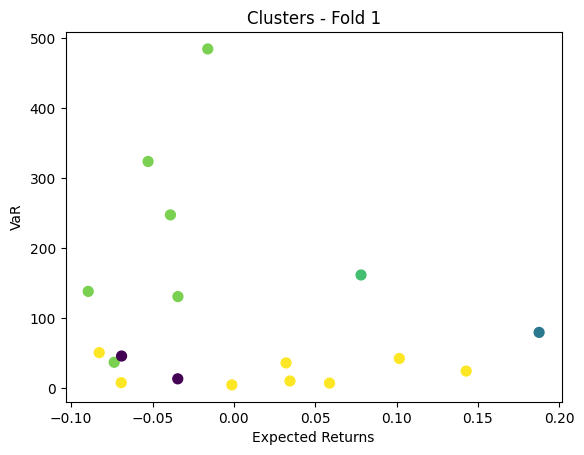

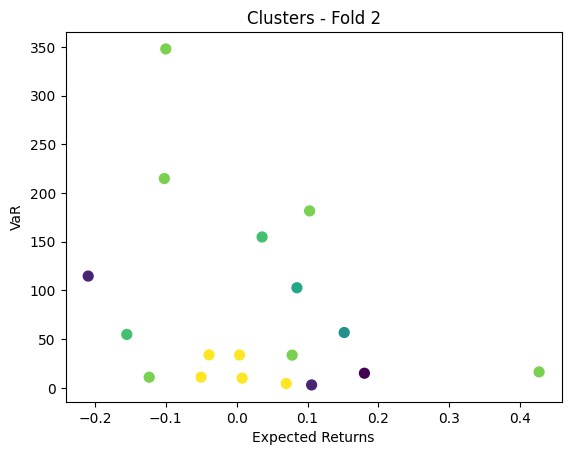

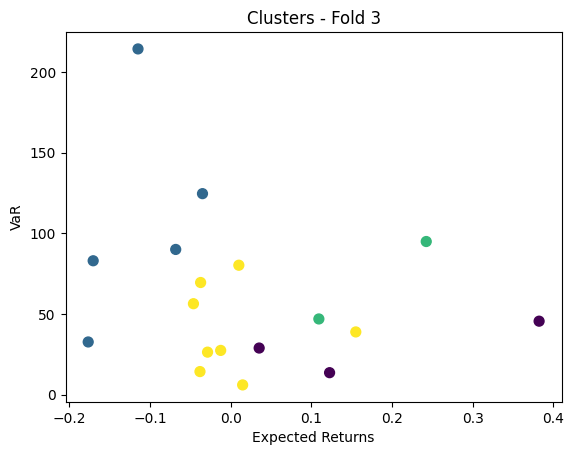

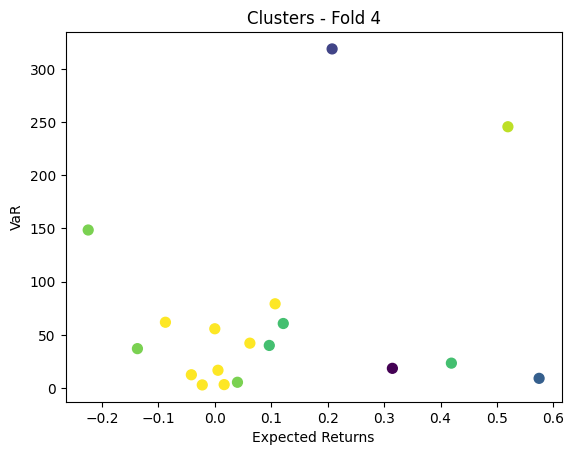

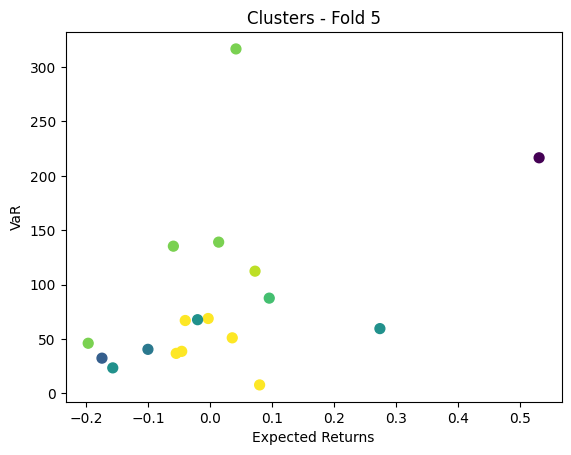

Fold 1: Silhouette Score = -0.16094382320242684
Fold 2: Silhouette Score = 0.11646406253168551
Fold 3: Silhouette Score = 0.4054907272529927
Fold 4: Silhouette Score = 0.41536046747230787
Fold 5: Silhouette Score = -0.04220329555757251

Average Silhouette Score across all folds: 0.14683362769939734


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold


num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store silhouette scores for each fold
silhouette_scores = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]



    # # Predict clusters on the test data

    labels_gmm = gmm.predict(X_test)    # Calculate silhouette score for the fold
    silhouette_avg = silhouette_score(X_test, labels_gmm)
    silhouette_scores.append(silhouette_avg)

    # Visualize the clusters for each fold (optional)
    plt.scatter(X_test[:, 0], X_test[:, 1], s=50, c=labels_gmm, cmap='viridis')
    plt.title(f'Clusters - Fold {fold + 1}')
    plt.xlabel('Expected Returns')
    plt.ylabel('VaR')
    plt.show()

# Print the silhouette scores for each fold
for fold, score in enumerate(silhouette_scores):
    print(f"Fold {fold + 1}: Silhouette Score = {score}")

# Print the average silhouette score across all folds
average_score = np.mean(silhouette_scores)
print(f"\nAverage Silhouette Score across all folds: {average_score}")



In [ ]:
dataset['cluster'] = labels
dataset

,Company Name,Code,Expt_Ret,Var,Composite_Ratio,Intrinsic_Value,cluster
0,Reliance Industries Ltd,RELI,-0.034402,130.900270,14.8885,2823.650596,8
1,TCS,TCS,0.014185,139.065104,14.6260,-108.779388,8
2,HDFC Bank Ltd.,HDBK,0.095821,87.581010,30.4225,-9628.323414,7
3,Infosys Ltd.,INFY,0.010215,80.181204,11.9180,-4.452373,10
4,HDFC Ltd.,HDFC,0.078156,161.718709,30.4225,-11679.306780,7
...,...,...,...,...,...,...,...
85,SAIL (Steel Authority of India Ltd.),SAIL,0.016605,3.196678,14.9855,887.684779,10
86,Eicher Motors Ltd.,EICH,-0.039003,247.407547,11.9565,6394.887013,8
87,Indraprastha Gas Ltd.,IGAS,-0.012288,27.376710,12.3160,-714.810497,10
88,Indigo Paints Ltd.,INDG,-0.224297,148.586109,23.1795,16368.332620,8


*   Below code represents the Combinations of various stocks

In [ ]:
from itertools import product

def generate_combinations(stock_codes, cluster_numbers, max_companies_per_combination=10, num_groups=3):
    combinations = [[] for _ in range(num_groups)]
    used_stock_codes = set()

    for combination in product(stock_codes, cluster_numbers):
        # Check if the stock code is already used in another combination
        stock_code = combination[0]
        if stock_code not in used_stock_codes:
            # Find the group index for the stock code
            group_index = len(used_stock_codes) % num_groups
            combinations[group_index].append(combination)
            used_stock_codes.add(stock_code)

    return combinations

# Example usage:
# Assuming 'dataset' is a DataFrame and you want to use the 'Code' and 'cluster' columns
stock_codes = dataset['Code']
cluster_numbers = dataset['cluster']

combinations = generate_combinations(stock_codes, cluster_numbers, max_companies_per_combination=10, num_groups=9)

# Print the generated combinations for each group
for group_index, group_combinations in enumerate(combinations):
    print(f"Group {group_index + 1} combinations:")
    for combination in group_combinations:
        print(combination)
    print()



Group 1 combinations:
('RELI', 8)
('BJFN', 8)
('NEST', 8)
('NTPC', 8)
('SUN', 8)
('TTCH', 8)
('TORP', 8)
('GOCP', 8)
('BOB', 8)
('BFRG', 8)

Group 2 combinations:
('TCS', 8)
('ITC', 8)
('TAMO', 8)
('SBIL', 8)
('CIPL', 8)
('MUTT', 8)
('COLG', 8)
('UBBW', 8)
('GMRI', 8)
('JSWE', 8)

Group 3 combinations:
('HDBK', 8)
('LART', 8)
('ULTC', 8)
('DIVI', 8)
('HROM', 8)
('PWFC', 8)
('HPCL', 8)
('GLEN', 8)
('CAST', 8)
('ESCO', 8)

Group 4 combinations:
('INFY', 8)
('ASPN', 8)
('TITN', 8)
('HALC', 8)
('UPLL', 8)
('ADEL', 8)
('BPCL', 8)
('BION', 8)
('NMDC', 8)
('EXID', 8)

Group 5 combinations:
('HDFC', 8)
('AXBK', 8)
('PGRD', 8)
('IOC', 8)
('GRAS', 8)
('HVEL', 8)
('BRGR', 8)
('TTPW', 8)
('HIAE', 8)
('SAIL', 8)

Group 6 combinations:
('ICBK', 8)
('MAHM', 8)
('ARBN', 8)
('COAL', 8)
('TISC', 8)
('PNBK', 8)
('INIR', 8)
('PLNG', 8)
('TREN', 8)
('EICH', 8)

Group 7 combinations:
('KTKM', 8)
('HCLT', 8)
('APSE', 8)
('TEML', 8)
('JSTL', 8)
('CROP', 8)
('RYMD', 8)
('AVEU', 8)
('PIDI', 8)
('IGAS', 8)

Grou

#4.Comparison of K-Means and GMM

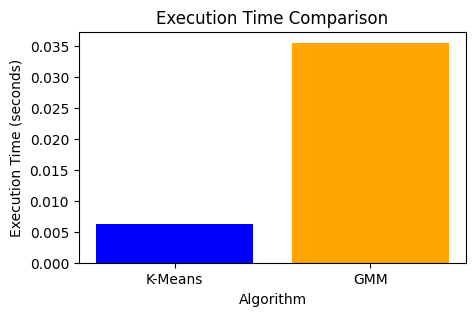

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import mixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Function to plot cluster points
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
plt.figure(figsize=(5, 3))
execution_times = [end_time_kmeans - start_time_kmeans, end_time_gmm - start_time_gmm]
algorithms = ['K-Means', 'GMM']
plt.bar(algorithms, execution_times, color=['blue', 'orange'])
plt.title('Execution Time Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.show()

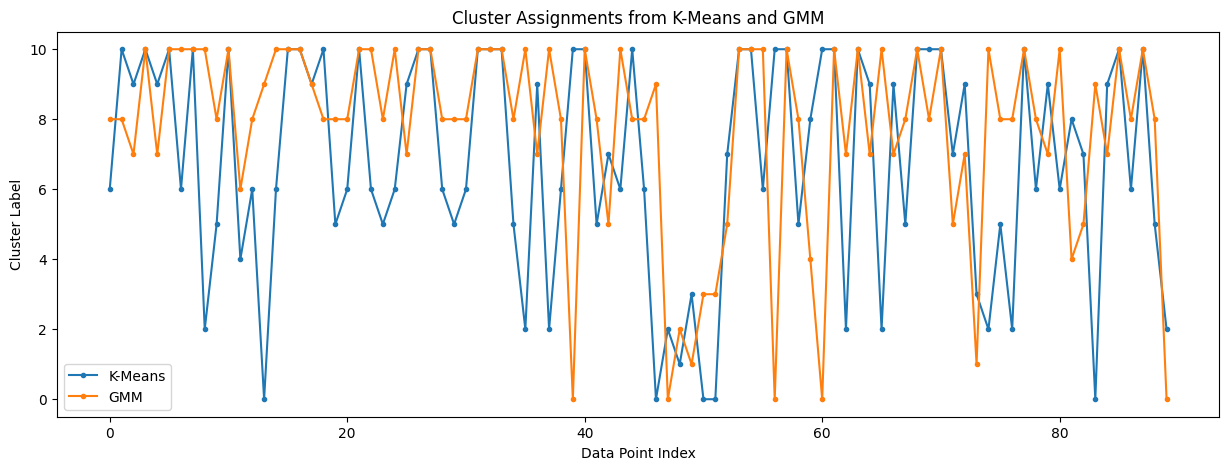

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(X)), y_kmeans, label='K-Means', linestyle='-', marker='.')
plt.plot(range(len(X)), labels, label='GMM', linestyle='-', marker='.')
plt.title('Cluster Assignments from K-Means and GMM')
plt.xlabel('Data Point Index')
plt.ylabel('Cluster Label')
plt.legend()
plt.show()